## Regression With Neural Networks


In [ ]:
#importing required modules
import numpy as np
import pandas
import tensorflow as tf
from tensorflow.keras import Sequential #create model
from tensorflow.keras.layers import Dense #add layers to model
from tensorflow.keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error #to calculate mse
from sklearn.model_selection import train_test_split #to split the data
import matplotlib.pyplot as plt

np.random.seed(1337) # for reproducibility

In [ ]:
dataframe = pandas.read_csv("https://raw.githubusercontent.com/eijaz1/Deep-Learning-in-Keras-Tutorial/master/data/hourly_wages_data.csv")
dataset = dataframe.values

In [ ]:
dataframe.head() #head view of the data

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [ ]:
X = dataframe.drop(columns=['wage_per_hour']).values #Features
Y = dataframe['wage_per_hour'].values #Target

print("X shape= "+str(X.shape),"\n""Y shape= "+str(Y.reshape(-1,1).shape)) #checking consistancy of the data

# Data Split and Checking Strutures

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3) #spliting the data into testing and training
print("X_train shape= "+str(X_train.shape),"\n""Y_train shape= "+str(Y_train.reshape(-1,1).shape)) #data checking (training data)
print("X_test shape= "+str(X_test.shape),"\n""Y_test shape= "+str(Y_test.reshape(-1,1).shape)) #data checking (testing data)

X_train shape= (373, 9) 
Y_train shape= (373, 1)
X_test shape= (161, 9) 
Y_test shape= (161, 1)


In [ ]:
#creating the model
def wages():
    model = Sequential()
    model.add(Dense(units = 7, input_dim=9, activation='relu'))
    model.add(Dense(units = 3, activation='relu'))

    model.add(Dense(units=1, activation='linear')) 

    model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse]) #line to compute the mean squared error
    
    return model

In [ ]:
model = wages() #initializing the model
model.summary() #checking model parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 70        
                                                                 
 dense_1 (Dense)             (None, 3)                 24        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=4, verbose=1) #training the model

Epoch 1/24
94/94 [==============================] - 1s 1ms/step - loss: 115.3904 - mean_squared_error: 115.3904
Epoch 2/24
94/94 [==============================] - 0s 1ms/step - loss: 35.2597 - mean_squared_error: 35.2597
Epoch 3/24
94/94 [==============================] - 0s 1ms/step - loss: 29.7920 - mean_squared_error: 29.7920
Epoch 4/24
94/94 [==============================] - 0s 1ms/step - loss: 27.6132 - mean_squared_error: 27.6132
Epoch 5/24
94/94 [==============================] - 0s 1ms/step - loss: 26.5104 - mean_squared_error: 26.5104
Epoch 6/24
94/94 [==============================] - 0s 1ms/step - loss: 25.7143 - mean_squared_error: 25.7143
Epoch 7/24
94/94 [==============================] - 0s 1ms/step - loss: 25.0420 - mean_squared_error: 25.0420
Epoch 8/24
94/94 [==============================] - 0s 1ms/step - loss: 24.1868 - mean_squared_error: 24.1868
Epoch 9/24
94/94 [==============================] - 0s 1ms/step - loss: 24.8904 - mean_squared_error: 24.8904
Epoch 10

In [ ]:
prediction = model.predict(X_test) #Testing the model
print("MSE= "+str(mean_squared_error(Y_test, prediction))) #computing the mean squared error. Checking the performance of the model

MSE= 14.202530877533933


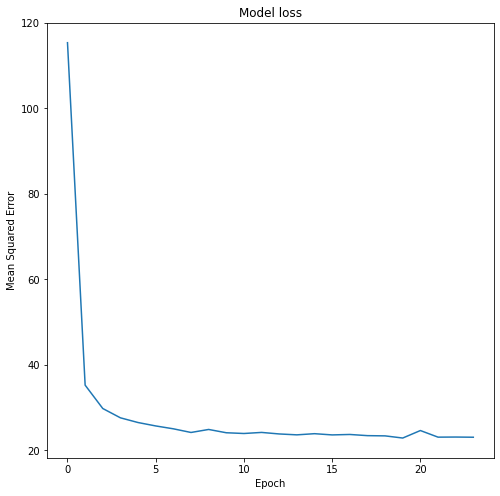

In [ ]:
#Plot of the model loss in training
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()